In [1]:
import experiment_utils
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from moopt import monise
from fair_models import FairScalarization, EqualScalarization
from model_aggregation import compare_ensembles_fair_metrics, compare_ensembles_nds

In [2]:
#data = pd.read_csv("Datasets - Limpos/compas_onerace.csv")
#fair_feature = "not_white"
#pred_feature = "Two_yr_Recidivism"
dataset = 'compas'
fair_feature = 'race'

In [3]:
X_train = pd.read_pickle("data/"+dataset+"_"+fair_feature+"/X_train.pickle")
with open("data/"+dataset+"_"+fair_feature+"/y_train.pickle", 'rb') as f:
    y_train = pickle.load(f)

X_val = pd.read_pickle("data/"+dataset+"_"+fair_feature+"/X_valid.pickle")
with open("data/"+dataset+"_"+fair_feature+"/y_valid.pickle", 'rb') as f:
    y_val = pickle.load(f)

X_test = pd.read_pickle("data/"+dataset+"_"+fair_feature+"/X_test.pickle")
with open("data/"+dataset+"_"+fair_feature+"/y_test.pickle", 'rb') as f:
    y_test = pickle.load(f)

# MOOError

In [4]:
## Train 150 models
moo_err = monise(weightedScalar=FairScalarization(X_train, y_train, fair_feature),
                singleScalar=FairScalarization(X_train, y_train, fair_feature),
                nodeTimeLimit=2, targetSize=150,
                targetGap=0, nodeGap=0.05, norm=False)

moo_err.optimize()

## Evaluate the models in val
mooerr_values = []
mooerr_sols = []

for solution in moo_err.solutionsList:
    mooerr_sols.append(solution.x)
    mooerr_values.append(experiment_utils.evaluate_model_test(solution.x, fair_feature, X_val, y_val))

mooerr_df = pd.DataFrame(mooerr_values)

2021-08-25 09:57:01,883 - moopt.monise - DEBUG: Finding 1th individual minima
2021-08-25 09:57:01,938 - moopt.monise - DEBUG: Finding 2th individual minima
2021-08-25 09:57:02,030 - moopt.monise - DEBUG: Finding 3th individual minima


Academic license - for non-commercial use only - expires 2021-10-17
Using license file /home/viguardieiro/gurobi.lic


2021-08-25 09:57:02,194 - moopt.monise - DEBUG: 4th solution - importance: 1.0
2021-08-25 09:57:02,287 - moopt.monise - DEBUG: 5th solution - importance: 1.0
2021-08-25 09:57:02,403 - moopt.monise - DEBUG: 6th solution - importance: 1.0
2021-08-25 09:57:02,558 - moopt.monise - DEBUG: 7th solution - importance: 1.0
2021-08-25 09:57:02,712 - moopt.monise - DEBUG: 8th solution - importance: 1.0
2021-08-25 09:57:02,867 - moopt.monise - DEBUG: 9th solution - importance: 0.7988211334396822
2021-08-25 09:57:03,036 - moopt.monise - DEBUG: 10th solution - importance: 0.40494742894494073
2021-08-25 09:57:03,200 - moopt.monise - DEBUG: 11th solution - importance: 0.3943057454005531
2021-08-25 09:57:03,384 - moopt.monise - DEBUG: 12th solution - importance: 0.20410364844362613
2021-08-25 09:57:03,523 - moopt.monise - DEBUG: 13th solution - importance: 0.20348262095227188
2021-08-25 09:57:03,698 - moopt.monise - DEBUG: 14th solution - importance: 0.1730559416923613
2021-08-25 09:57:03,883 - moopt.m

In [5]:
err_fair_results = compare_ensembles_fair_metrics(mooerr_df, mooerr_sols, fair_feature, X_test, y_test)
err_nds_results = compare_ensembles_nds(mooerr_df, mooerr_sols, fair_feature, X_test, y_test)

In [6]:
## Train 150 models
mooacep = monise(weightedScalar=EqualScalarization(X_train, y_train, fair_feature),
            singleScalar=EqualScalarization(X_train, y_train, fair_feature),
            nodeTimeLimit=2, targetSize=150,
            targetGap=0, nodeGap=0.01, norm=False)

mooacep.optimize()

## Evaluate the models in val
mooacc_values = []
mooacc_sols = []

for solution in mooacep.solutionsList:
    mooacc_sols.append(solution.x)
    mooacc_values.append(experiment_utils.evaluate_model_test(solution.x, fair_feature, X_val, y_val))

mooacep_df = pd.DataFrame(mooacc_values)

2021-08-25 10:00:09,917 - moopt.monise - DEBUG: Finding 1th individual minima
2021-08-25 10:00:10,029 - moopt.monise - DEBUG: Finding 2th individual minima
2021-08-25 10:00:10,199 - moopt.monise - DEBUG: Finding 3th individual minima
2021-08-25 10:00:10,347 - moopt.monise - DEBUG: Finding 4th individual minima
2021-08-25 10:00:10,548 - moopt.monise - DEBUG: 5th solution - importance: 1.0
2021-08-25 10:00:10,722 - moopt.monise - DEBUG: 6th solution - importance: 1.0
2021-08-25 10:00:10,869 - moopt.monise - DEBUG: 7th solution - importance: 1.0
2021-08-25 10:00:11,026 - moopt.monise - DEBUG: 8th solution - importance: 1.0
2021-08-25 10:00:11,205 - moopt.monise - DEBUG: 9th solution - importance: 1.0
2021-08-25 10:00:11,451 - moopt.monise - DEBUG: 10th solution - importance: 0.6307643494781998
2021-08-25 10:00:11,636 - moopt.monise - DEBUG: 11th solution - importance: 0.49635107719875093
2021-08-25 10:00:11,820 - moopt.monise - DEBUG: 12th solution - importance: 0.3597108193047771
2021-08

In [7]:
acep_fair_results = compare_ensembles_fair_metrics(mooacep_df, mooacc_sols, fair_feature, X_test, y_test)
acep_nds_results = compare_ensembles_nds(mooacep_df, mooacc_sols, fair_feature, X_test, y_test)

# Vis

In [8]:
def vis_comp(err_results, acep_results):
    fig, axs = plt.subplots(nrows=2, ncols=4, constrained_layout=True, figsize=(15,6), sharex=True)

    # MOOErr
    err_results['Acc'].plot.bar(ax=axs[0,0], zorder=3)
    axs[0, 0].set_title('Accuracy')
    axs[0, 0].set_ylabel('MOOErr', fontsize=12)
    high_acc = max(err_results['Acc'].max(), acep_results['Acc'].max())
    low_acc = min(err_results['Acc'].min(), acep_results['Acc'].min())
    axs[0, 0].set_ylim([low_acc-0.25*(high_acc-low_acc), high_acc+0.25*(high_acc-low_acc)])

    err_results['DP'].plot.bar(ax=axs[0,1], zorder=3)
    axs[0, 1].set_title('Demographic Parity')
    high_dp = max(err_results['DP'].max(), acep_results['DP'].max())
    low_dp = min(err_results['DP'].min(), acep_results['DP'].min())
    axs[0, 1].set_ylim([low_dp-0.25*(high_dp-low_dp), high_dp+0.25*(high_dp-low_dp)])

    err_results['EO'].plot.bar(ax=axs[0,2], zorder=3)
    axs[0, 2].set_title('Equal Oportunity')
    high_eo = max(err_results['EO'].max(), acep_results['EO'].max())
    low_eo = min(err_results['EO'].min(), acep_results['EO'].min())
    axs[0, 2].set_ylim([low_eo-0.25*(high_eo-low_eo), high_eo+0.25*(high_eo-low_eo)])

    err_results['CV'].plot.bar(ax=axs[0,3], zorder=3)
    axs[0, 3].set_title('Coeficient of Variation')
    high_cv = max(err_results['CV'].max(), acep_results['CV'].max())
    low_cv = min(err_results['CV'].min(), acep_results['CV'].min())
    axs[0, 3].set_ylim([low_cv-0.25*(high_cv-low_cv), high_cv+0.25*(high_cv-low_cv)])

    # MOOAcep
    acep_results['Acc'].plot.bar(ax=axs[1,0], color='red', zorder=3)
    axs[1, 0].set_xlabel('Filter')
    axs[1, 0].set_xticklabels(acep_results.index, rotation=45, ha="right", rotation_mode="anchor")
    axs[1, 0].set_ylabel('MOOAcep', fontsize=12)
    axs[1, 0].set_ylim([low_acc-0.25*(high_acc-low_acc), high_acc+0.25*(high_acc-low_acc)])

    acep_results['DP'].plot.bar(ax=axs[1,1], color='red', zorder=3)
    axs[1, 1].set_xticklabels(acep_results.index, rotation=45, ha="right", rotation_mode="anchor")
    axs[1, 1].set_xlabel('Filter')
    axs[1, 1].set_ylim([low_dp-0.25*(high_dp-low_dp), high_dp+0.25*(high_dp-low_dp)])

    acep_results['EO'].plot.bar(ax=axs[1,2], color='r', zorder=3)
    axs[1, 2].set_xlabel('Filter')
    axs[1, 2].set_xticklabels(acep_results.index, rotation=45, ha="right", rotation_mode="anchor")
    axs[1, 2].set_ylim([low_eo-0.25*(high_eo-low_eo), high_eo+0.25*(high_eo-low_eo)])

    acep_results['CV'].plot.bar(ax=axs[1,3], color='r', zorder=3)
    axs[1, 3].set_xlabel('Filter')
    axs[1, 3].set_xticklabels(acep_results.index, rotation=45, ha="right", rotation_mode="anchor")
    axs[1, 3].set_ylim([low_cv-0.25*(high_cv-low_cv), high_cv+0.25*(high_cv-low_cv)])

    for ax in axs.flatten():
        #ax.xaxis.set_tick_params(labelbottom=True)
        ax.yaxis.set_tick_params(labelleft=True)
        ax.grid(axis='y', color='gray', linestyle='dotted')

    #plt.show()
    return fig, axs

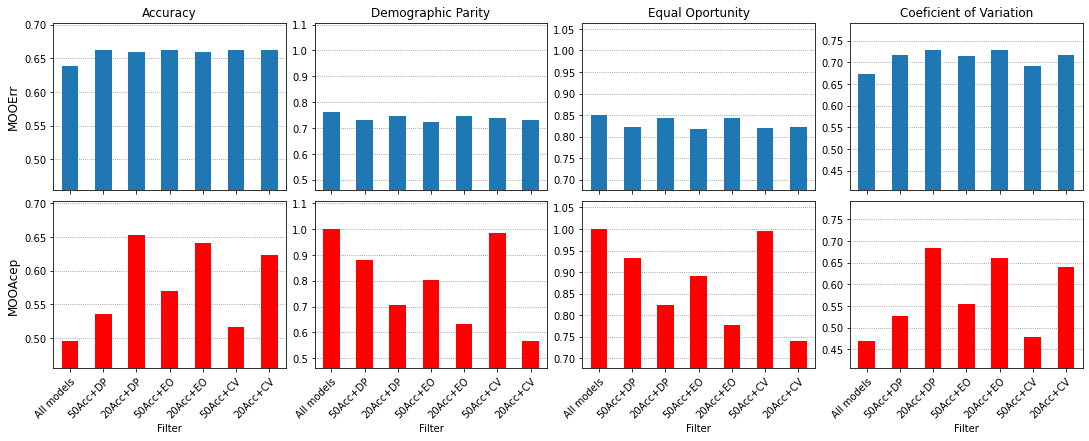

In [9]:
fig, axs = vis_comp(err_fair_results, acep_fair_results)
#fig.suptitle('Fair Metric Filter', size=14)
plt.show()

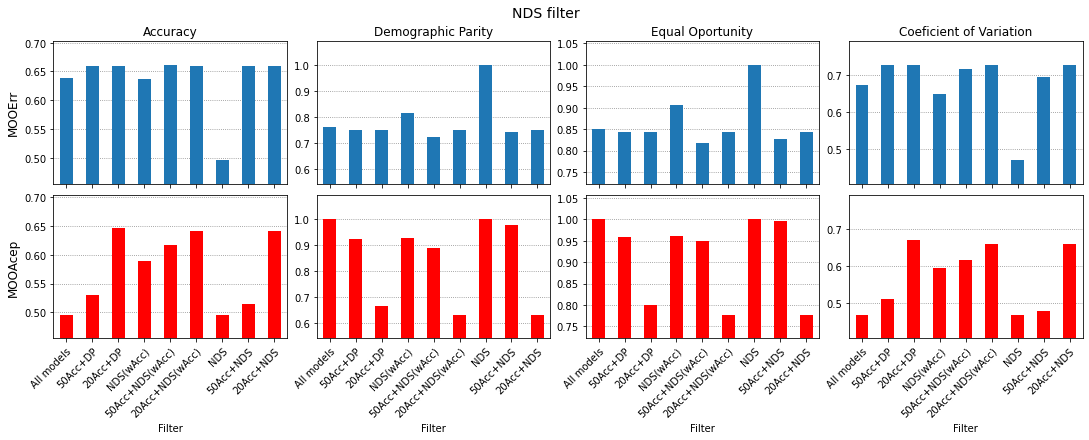

In [ ]:
fig, axs = vis_comp(err_nds_results, acep_nds_results)
#fig.suptitle('NDS filter', size=14)
plt.show()

In [ ]:
err_nds_results

,Acc,EO,DP,CV
Filter,,,,
All models,0.638889,0.850315,0.761017,0.673215
50Acc+DP,0.659091,0.842496,0.748045,0.727287
20Acc+DP,0.659091,0.842496,0.748045,0.727287
NDS(wAcc),0.637626,0.905530,0.816125,0.648586
50Acc+NDS(wAcc),0.661616,0.817119,0.722795,0.715320
20Acc+NDS(wAcc),0.659091,0.842496,0.748045,0.727287
NDS,0.496212,1.000000,1.000000,0.470204
50Acc+NDS,0.660354,0.825988,0.741028,0.694655
20Acc+NDS,0.659091,0.842496,0.748045,0.727287


In [ ]:
acep_nds_results

,Acc,EO,DP,CV
Filter,,,,
All models,0.496212,1.000000,1.000000,0.470204
50Acc+DP,0.530303,0.957891,0.923898,0.510777
20Acc+DP,0.646465,0.799598,0.666980,0.672583
NDS(wAcc),0.588384,0.960590,0.929805,0.595006
50Acc+NDS(wAcc),0.617424,0.949765,0.890644,0.618169
20Acc+NDS(wAcc),0.641414,0.777751,0.634331,0.660767
NDS,0.496212,1.000000,1.000000,0.470204
50Acc+NDS,0.515152,0.995025,0.979614,0.479133
20Acc+NDS,0.641414,0.777751,0.634331,0.660767
